In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
df = pd.read_csv('../datasets/email_spam_dataset.csv')

In [3]:
# 2 Feature and traget
# Note number of emails here means how many mails were it sent to
# in the chain of a single email, how many recepients were there
x = df[['Num_Emails']]
y = df[['Spam']]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42, stratify=y)

In [5]:
print(f"Training Samples: {len(x_train)}")
print(f"Testing samples: {len(x_test)}")

Training Samples: 800
Testing samples: 200


In [6]:
model = LogisticRegression()
model.fit(x_train, y_train)

c:\Users\dbda.STUDENTSDC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [14]:
y_prob = model.predict_proba(x_test)[:,1]   #Probability that spam is 1
y_pred = (y_prob >= 0.5).astype(int)    #Decision Boundary
print(y_prob, y_pred)

[0.38087665 0.03951997 0.16589329 0.02036441 0.28782074 0.49014979
 0.4967136  0.06192279 0.38708813 0.45091683 0.08295777 0.30982211
 0.35643534 0.04262123 0.58133024 0.04156247 0.5620426  0.46395099
 0.02089495 0.7067601  0.67882983 0.53604121 0.08915134 0.15527714
 0.21418278 0.04370573 0.06831259 0.18094237 0.32691519 0.31546524
 0.04262123 0.07904876 0.02256899 0.50327855 0.04262123 0.0375739
 0.26677784 0.03482654 0.06041481 0.5620426  0.73321603 0.43794968
 0.24189221 0.0375739  0.36248158 0.03663573 0.20979615 0.06666006
 0.06041481 0.67307791 0.01934262 0.5620426  0.01885074 0.07904876
 0.41228481 0.67882983 0.09575904 0.57492558 0.39333654 0.7067601
 0.15186379 0.16589329 0.60665597 0.75325378 0.08098176 0.73321603
 0.63751117 0.02256899 0.74336293 0.55556846 0.06041481 0.54256559
 0.04481653 0.39333654 0.772254   0.03310363 0.75325378 0.35643534
 0.6957583  0.71217283 0.01934262 0.74834061 0.69017118 0.50327855
 0.08295777 0.52295758 0.17708311 0.08497753 0.05750143 0.070003

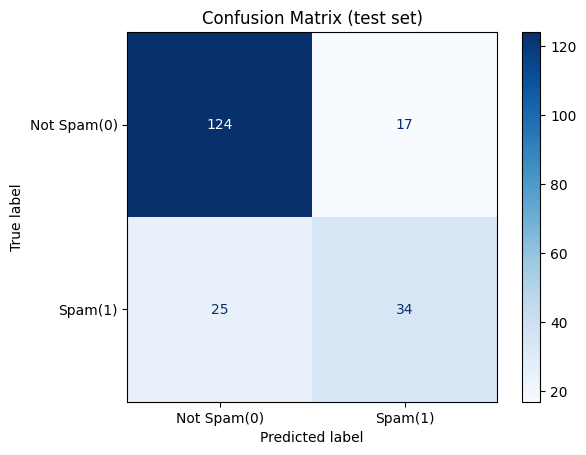

In [16]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Spam(0)","Spam(1)"])
disp.plot(cmap = 'Blues')
plt.title("Confusion Matrix (test set)")
plt.show()

In [12]:
# Evaluation Metrics
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print(acc,prec, rec,f1)

0.79 0.6666666666666666 0.576271186440678 0.6181818181818182
